### periodic forced pendulum mapping at a period

In [7]:
import numpy as np

import matplotlib.pyplot as plt
from scipy.integrate import odeint

%matplotlib notebook 

Our Hamiltonian 
$$ H(\phi,p,t) = \frac{p^2}{2} - \epsilon \cos(\phi) - \mu \cos(\phi - \nu t) $$
$$ {\bf y} = [\phi,p]$$
Hamilton's equations give 
$$ d{\bf y}/dt = [\dot \phi, \dot p] 
       = [p, -\epsilon \sin(\phi) - \mu \sin(\phi - \nu t)] $$

In [2]:
# set up equations of motion
# y = [phi,p]  dimension 2
# H(phi,p,t) = p^2/2 - epsilon*cos phi - mu*cos(phi - nu t)
# dy/dt = [\dot phi, \dot p]
#       = [p, -epsilon*sin(phi) - mu*sin(phi - nu*t)]
#There should be two islands, one at p=0 and the other at p=nu
#the widths of these are set by \sqrt{2 epsilon} and \sqrt{2 mu}


# dy/dt = func(y,t), needed for integrator!
# note that y[0] = phi and y[1] = p
def func(y,t,epsilon,mu,nu):
        return [y[1],-epsilon*np.sin(y[0]) - mu*np.sin(y[0] - nu*t)]

# the jacobian Dfunc
def jacobian(y,t,epsilon,mu,nu):
        return [[0,1],[epsilon*np.cos(y[0]) + mu*np.cos(y[0]-nu*t),0]]

    

In [16]:
# integrate at a period, the forced pendulum 
# arguments:
#   y0 is initial conditions, 
#   npoints is number of points we want
#   epsilon, mu, nu are parameters of hamiltonian model
#
#   integrate every period, npoints returned
# returns: phi,p arrays of integrated points 
def givepoints_arr(y0,npoints,epsilon,mu,nu,marker):
    # set up time array, every 2pi/nu so for period of perturbation
    step  = 2.0*np.pi/nu
    stop = step*npoints
    time  = np.arange(0.0,stop,step)  # time array
    # do the integration
    y = odeint(func, y0, time, args=(epsilon,mu,nu))
    #y2 = odeint(func, y0, time, Dfun=jacobian, args=(epsilon,mu,nu))
    phi = np.squeeze(y[:,0])  # is an array of phi at different times
    p = np.squeeze(y[:,1])   # is an array of momenta at different times
    period = 2.0*np.pi
    phi  = phi%period  # so that phi in [0:2pi]
    ii = phi >np.pi
    phi[ii]-= period  # now phi is in [-pi, pi]
    return phi,p 
    
    
# integrate points and plot them on axis      
def givepoints(y0,npoints,epsilon,mu,nu,marker,ax):
    phi,p=givepoints_arr(y0,npoints,epsilon,mu,nu,marker)
    ax.plot(phi,p,marker,markersize=0.5) # plot it


<IPython.core.display.Javascript object>


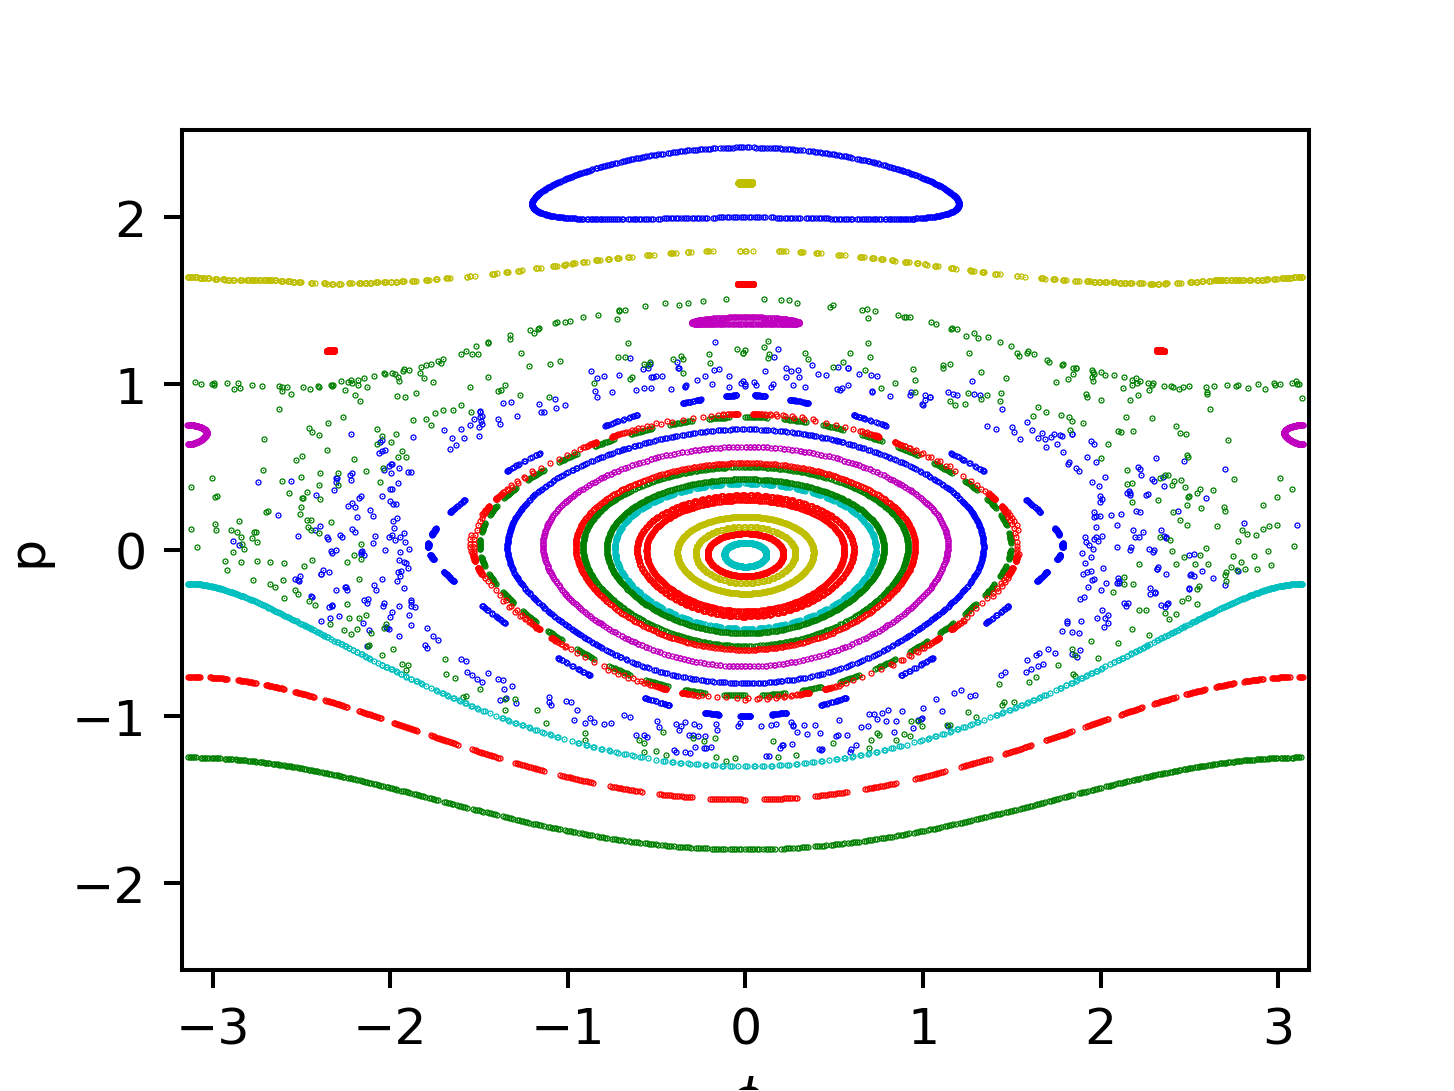

In [19]:

# choose parameters
nu=2.0
epsilon=0.4
mu=0.05
npoints=500

# set up display
fig,ax = plt.subplots(1,1,figsize=(4,3),dpi=200) 
ax.set_xlabel(r'$\phi$')
ax.set_ylabel('p')

fac=1.01
xmax = 1.0*np.pi
ymax = 2.5
ymin = -1.5
ax.set_xlim([-xmax*fac,xmax*fac])
ax.set_ylim([-ymax*fac,ymax*fac])


givepoints([0.0,0.1],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,0.2],npoints,epsilon,mu,nu,'y.',ax)
givepoints([0.0,0.3],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,0.4],npoints,epsilon,mu,nu,'c.',ax)
givepoints([0.0,0.5],npoints,epsilon,mu,nu,'g.',ax)
#givepoints([0.0,0.6],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,0.8],npoints,epsilon,mu,nu,'g.',ax)
givepoints([0.0,1.0],npoints,epsilon,mu,nu,'b.',ax)
givepoints([0.0,1.2],npoints,epsilon,mu,nu,'g.',ax)
givepoints([0.0,1.4],npoints,epsilon,mu,nu,'m.',ax)
givepoints([0.0,1.6],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,1.8],npoints,epsilon,mu,nu,'y.',ax)
givepoints([0.0,2.0],npoints,epsilon,mu,nu,'b.',ax)
givepoints([0.0,2.2],npoints,epsilon,mu,nu,'y.',ax)
#givepoints([0.0,2.4],npoints,epsilon,mu,nu,'b.',ax)
givepoints([0.0,-0.1],npoints,epsilon,mu,nu,'c.',ax)
givepoints([0.0,-0.2],npoints,epsilon,mu,nu,'y.',ax)
givepoints([0.0,-0.4],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,-0.5],npoints,epsilon,mu,nu,'g.',ax)
givepoints([0.0,-0.6],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,-0.7],npoints,epsilon,mu,nu,'m.',ax)
givepoints([0.0,-0.8],npoints,epsilon,mu,nu,'b.',ax)
givepoints([0.0,-0.9],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,-1.0],npoints,epsilon,mu,nu,'b.',ax)
givepoints([0.0,-1.3],npoints,epsilon,mu,nu,'c.',ax)
givepoints([0.0,-1.5],npoints,epsilon,mu,nu,'r.',ax)
givepoints([0.0,-1.8],npoints,epsilon,mu,nu,'g.',ax)
